<a href="https://colab.research.google.com/github/juanruiz23/Machine_Learning/blob/main/SerieNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [455]:
Df =  pd.read_csv('/content/Casos_positivos_de_COVID-19_en_Colombia (2).csv', sep=','  , engine='python', parse_dates=True) ; Df 
# La base se descargo ya filtrada para Bogotá (Por cuestiones de computador)
# Df= Df[Df['Nombre departamento'] == 'BOGOTA']

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461081,24/11/2021 0:00:00,5055249,22/11/2021 0:00:00,11,BOGOTA,11001,BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,5055275,21/11/2021 0:00:00,11,BOGOTA,11001,BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,5055276,22/11/2021 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461084,24/11/2021 0:00:00,5055277,22/11/2021 0:00:00,11,BOGOTA,11001,BOGOTA,32,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,23/11/2021 0:00:00,NaN,NaN,NaN,NaN


In [456]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461086 entries, 0 to 1461085
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             1461086 non-null  object 
 1   ID de caso                    1461086 non-null  int64  
 2   Fecha de notificación         1461086 non-null  object 
 3   Código DIVIPOLA departamento  1461086 non-null  int64  
 4   Nombre departamento           1461086 non-null  object 
 5   Código DIVIPOLA municipio     1461086 non-null  int64  
 6   Nombre municipio              1461086 non-null  object 
 7   Edad                          1461086 non-null  int64  
 8   Unidad de medida de edad      1461086 non-null  int64  
 9   Sexo                          1461086 non-null  object 
 10  Tipo de contagio              1461086 non-null  object 
 11  Ubicación del caso            1456279 non-null  object 
 12  Estado                      

In [5]:
Df.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [552]:
BaseDf = Df.filter(['Fecha de notificación','ID de caso','Edad','Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Recuperado'], axis = 1);BaseDf

,Fecha de notificación,ID de caso,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado
0,2/3/2020 0:00:00,1,19,F,Importado,Casa,Leve,Recuperado
1,9/3/2020 0:00:00,8,22,F,Importado,Casa,Leve,Recuperado
2,8/3/2020 0:00:00,9,28,F,Importado,Casa,Leve,Recuperado
3,12/3/2020 0:00:00,10,36,F,Importado,Casa,Leve,Recuperado
4,11/3/2020 0:00:00,11,42,F,Importado,Casa,Leve,Recuperado
...,...,...,...,...,...,...,...,...
1461081,22/11/2021 0:00:00,5055249,60,F,En estudio,Casa,Leve,Activo
1461082,21/11/2021 0:00:00,5055275,31,F,En estudio,Casa,Leve,Activo
1461083,22/11/2021 0:00:00,5055276,28,F,En estudio,Casa,Leve,Activo
1461084,22/11/2021 0:00:00,5055277,32,F,En estudio,Casa,Leve,Activo


In [553]:
BaseDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461086 entries, 0 to 1461085
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Fecha de notificación  1461086 non-null  object
 1   ID de caso             1461086 non-null  int64 
 2   Edad                   1461086 non-null  int64 
 3   Sexo                   1461086 non-null  object
 4   Tipo de contagio       1461086 non-null  object
 5   Ubicación del caso     1456279 non-null  object
 6   Estado                 1456279 non-null  object
 7   Recuperado             1457320 non-null  object
dtypes: int64(2), object(6)
memory usage: 89.2+ MB


In [554]:
BaseDf.isna().sum()

Fecha de notificación       0
ID de caso                  0
Edad                        0
Sexo                        0
Tipo de contagio            0
Ubicación del caso       4807
Estado                   4807
Recuperado               3766
dtype: int64

In [555]:
BaseDf['Fecha de notificación'] = BaseDf['Fecha de notificación'].str[:-7]

In [556]:
BaseDf


,Fecha de notificación,ID de caso,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado
0,2/3/2020,1,19,F,Importado,Casa,Leve,Recuperado
1,9/3/2020,8,22,F,Importado,Casa,Leve,Recuperado
2,8/3/2020,9,28,F,Importado,Casa,Leve,Recuperado
3,12/3/2020,10,36,F,Importado,Casa,Leve,Recuperado
4,11/3/2020,11,42,F,Importado,Casa,Leve,Recuperado
...,...,...,...,...,...,...,...,...
1461081,22/11/2021,5055249,60,F,En estudio,Casa,Leve,Activo
1461082,21/11/2021,5055275,31,F,En estudio,Casa,Leve,Activo
1461083,22/11/2021,5055276,28,F,En estudio,Casa,Leve,Activo
1461084,22/11/2021,5055277,32,F,En estudio,Casa,Leve,Activo


In [654]:
Sexo_Fecha = BaseDf.filter(['Fecha de notificación','Sexo']); Sexo_Fecha
Sexo_Fecha['Sexo']= Sexo_Fecha['Sexo'].replace(['m','f'],['M','F']); Sexo_Fecha
SerieFechaSexo = pd.concat([Sexo_Fecha,pd.get_dummies(Sexo_Fecha['Sexo'])], axis = 1)
SerieM = SerieFechaSexo
SerieH = SerieFechaSexo
SerieM = SerieM.drop(['Sexo','M'],axis = 1)
SerieH = SerieH.drop(['Sexo','F'],axis = 1)
SerieM = SerieM.groupby(['Fecha de notificación']).count()
SerieH = SerieH.groupby(['Fecha de notificación']).count()

In [638]:
Sexo_Fecha['Sexo']
BaseDf['Sexo'].value_counts()

F    781003
M    680072
m         6
f         5
Name: Sexo, dtype: int64

In [559]:
from datetime import datetime

In [572]:
Serie = pd.DataFrame(BaseDf['Fecha de notificación']) ; Serie
#Serie2 = pd.DataFrame(Serie.sort_values) ; Serie2
Serie = pd.DataFrame(Serie.value_counts()) ; Serie
#Serie.groupby(['Fecha de diagnóstico']).count()

,0
Fecha de notificación,
10/6/2021,12369
15/6/2021,12290
16/6/2021,12020
17/6/2021,11668
21/6/2021,11474
...,...
12/3/2020,5
23/11/2021,3
9/3/2020,1


In [573]:
S = Serie.rename_axis(['Fecha de notificación']).reset_index();S

,Fecha de notificación,0
0,10/6/2021,12369
1,15/6/2021,12290
2,16/6/2021,12020
3,17/6/2021,11668
4,21/6/2021,11474
...,...,...
621,12/3/2020,5
622,23/11/2021,3
623,9/3/2020,1
624,8/3/2020,1


In [574]:
S['Fecha de notificación']= S['Fecha de notificación'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09']); S

,Fecha de notificación,0
0,10/6/2021,12369
1,15/6/2021,12290
2,16/6/2021,12020
3,17/6/2021,11668
4,21/6/2021,11474
...,...,...
621,12/3/2020,5
622,23/11/2021,3
623,9/3/2020,1
624,8/3/2020,1


In [575]:
import datetime

In [576]:
# S['fecha reporte web'] = pd.to_datetime(S['fecha reporte web']); S #Cambia el orden de algunas fechas DD/MM >> MM/DD

In [577]:
Date = S['Fecha de notificación'].str.split('/', expand=True)
Date.columns = ['DD','MM','YY'] ; Date

,DD,MM,YY
0,10,6,2021
1,15,6,2021
2,16,6,2021
3,17,6,2021
4,21,6,2021
...,...,...,...
621,12,3,2020
622,23,11,2021
623,9,3,2020
624,8,3,2020


In [578]:
Date['MM']= Date['MM'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],['01','02','03','04','05','06','07','08','09','10','11','12'])
Date['DD']= Date['DD'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'])
Date

,DD,MM,YY
0,10,06,2021
1,15,06,2021
2,16,06,2021
3,17,06,2021
4,21,06,2021
...,...,...,...
621,12,03,2020
622,23,11,2021
623,09,03,2020
624,08,03,2020


In [579]:
Date["Full Date"] = Date["MM"] + "/" + Date["DD"] + "/"+ Date["YY"] ; Date

,DD,MM,YY,Full Date
0,10,06,2021,06/10/2021
1,15,06,2021,06/15/2021
2,16,06,2021,06/16/2021
3,17,06,2021,06/17/2021
4,21,06,2021,06/21/2021
...,...,...,...,...
621,12,03,2020,03/12/2020
622,23,11,2021,11/23/2021
623,09,03,2020,03/09/2020
624,08,03,2020,03/08/2020


In [580]:
S = pd.concat([S ,Date["Full Date"]], axis=1); S

,Fecha de notificación,0,Full Date
0,10/6/2021,12369,06/10/2021
1,15/6/2021,12290,06/15/2021
2,16/6/2021,12020,06/16/2021
3,17/6/2021,11668,06/17/2021
4,21/6/2021,11474,06/21/2021
...,...,...,...
621,12/3/2020,5,03/12/2020
622,23/11/2021,3,11/23/2021
623,9/3/2020,1,03/09/2020
624,8/3/2020,1,03/08/2020


In [582]:
S['Full Date'] = pd.to_datetime(S['Full Date']); S
S = S.drop(['Fecha de notificación'],axis = 1)
S = S.sort_values(by= 'Full Date')
S.columns = ['Casos','Date']; S
S = S.drop([622], axis=0)

In [583]:
S.set_index('Date',inplace=True)

In [584]:
S

,Casos
Date,
2020-03-02,1
2020-03-08,1
2020-03-09,1
2020-03-11,5
2020-03-12,5
...,...
2021-11-18,359
2021-11-19,265
2021-11-20,201


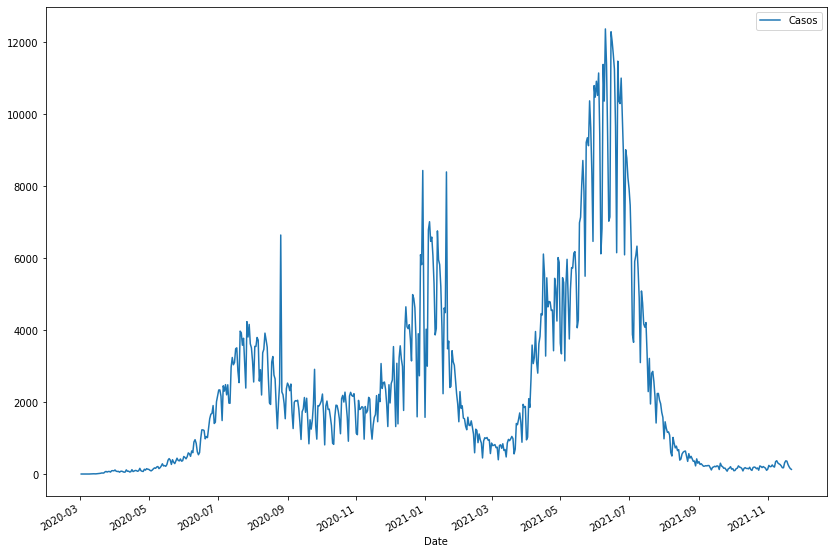

In [585]:

S.plot(kind = 'line', figsize= (14,10))

# **Análisis exploratorio**

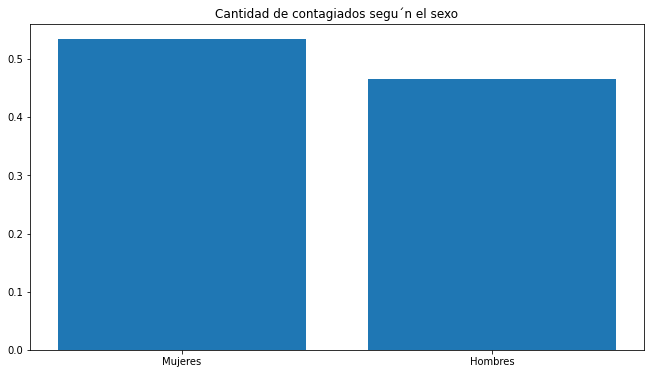

In [673]:
plt.figure(figsize = (11,6))

x = [sum(SerieFechaSexo['Sexo'] == 'F')/len(SerieFechaSexo['Sexo']), sum(SerieFechaSexo['Sexo'] == 'M')/len(SerieFechaSexo['Sexo'])]
name = ['Mujeres', 'Hombres']
plt.bar(name, x)
plt.title('Cantidad de contagiados segu´n el sexo')


plt.show()


Se observa que entre las notificaciones de contagio ha sido mas frecuente que sea por parte del sexo femenino en comparacio´n con el masculino.


In [586]:
print(S.index.min())
print(S.index.max())

2020-03-02 00:00:00
2021-11-22 00:00:00


La serie de tiempo contempla las fechas diarias entre el 02 de marzo del 2020 y el 22 de noviembre del 2021



In [587]:
print(len(S['2020']))
print(len(S['2021']))

299
326


Se contempla que para el año 2020 se obtuvo una muestra de 299 día de reportes de contagio, mientras que para el 2021 se tiene una recoleción de 326 días de reportes de contagio. Apesar de tener en observación dos años, no se asumen 365 recolecciones de información por año, puesto que para el 2020 la medición inicio sobre el mes de agosto, mientra que el año 2021 sigue en curso. 
 

In [588]:
S.describe()

,Casos
count,625.000000
mean,2337.732800
std,2596.853151
min,1.000000
25%,352.000000
50%,1576.000000
75%,3242.000000
max,12369.000000


In [674]:
sum(S['Casos'])

1461083

De 625 días observados, en promedio por día se contagiaron 2337 personas, teniendo en cuenta una desviación estandar de 2596 contagios. Se tiene tambien que el día con mayor cotagios fue de 12369 personas notificadas. 

In [592]:
# Promedio mesnual
Mes = S.resample('M').mean()
Mes

,Casos
Date,
2020-03-31,34.750000
2020-04-30,89.133333
2020-05-31,266.612903
2020-06-30,993.033333
2020-07-31,2939.193548
2020-08-31,2869.870968
2020-09-30,1802.433333
2020-10-31,1759.935484
2020-11-30,1849.033333


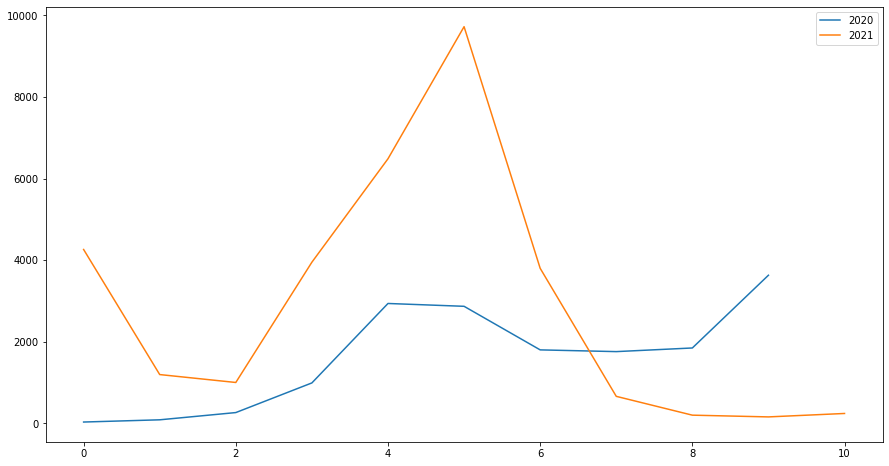

In [599]:
plt.figure(figsize = (15,8))

plt.plot(Mes['2020'].values, label= '2020')
plt.plot(Mes['2021'].values, label = '2021')

plt.legend()

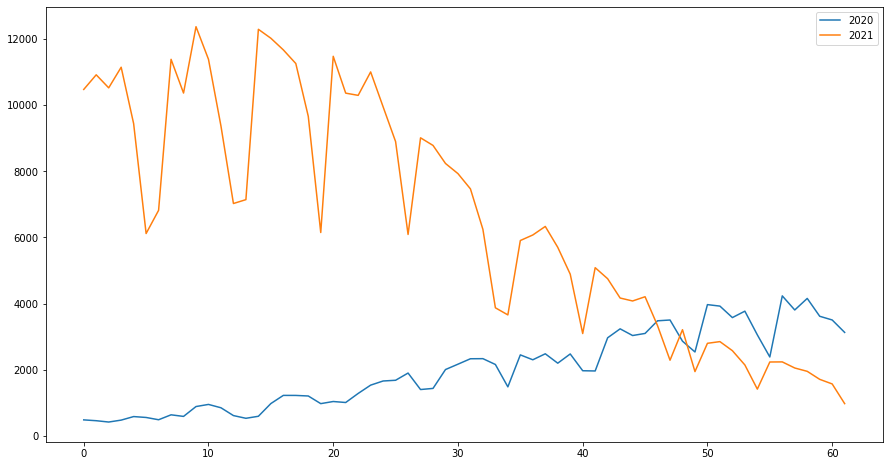

In [600]:
# Vacaciones mitad de año
Va2020 = S['2020-06-01':'2020-08-01']
Va2021 = S['2021-06-01':'2021-08-01']

plt.figure(figsize = (15,8))

plt.plot(Va2020.values, label= '2020')
plt.plot(Va2021.values, label = '2021')

plt.legend()

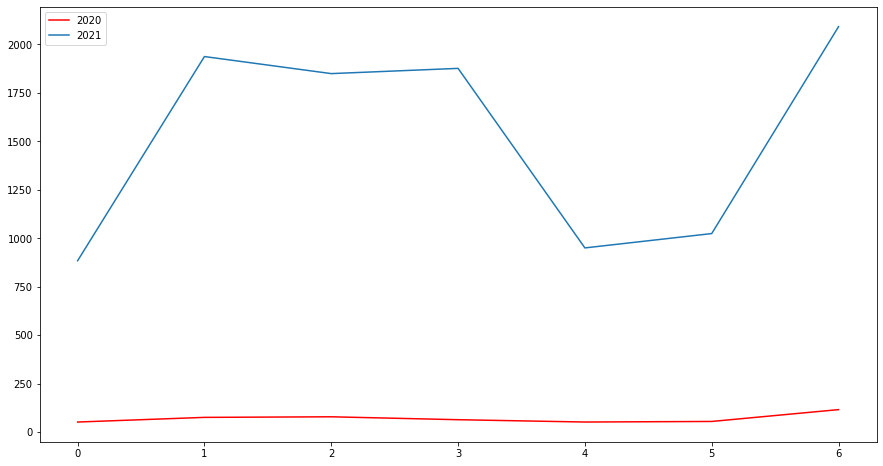

In [604]:
# Semana Santa
SemS2020 = S['2020-04-05':'2020-04-11']
SemS2021 = S['2021-03-28':'2021-04-03']

plt.figure(figsize = (15,8))

plt.plot(SemS2020.values, label= '2020', color = 'red')
plt.plot(SemS2021.values, label = '2021')

plt.legend()

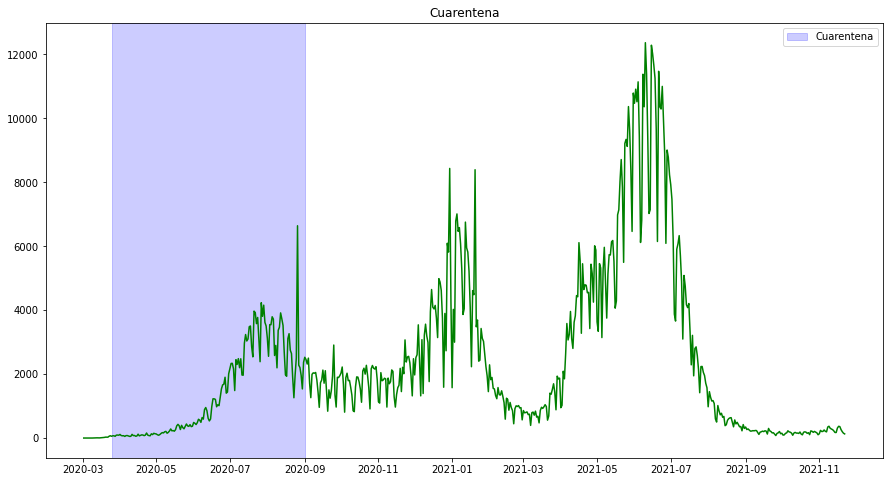

In [615]:
# Cuarentena en Bogotá
fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.plot(S['Casos'][:625], color = 'Green')
ax.axvspan(pd.Timestamp('2020-03-25'),pd.Timestamp('2020-09-01'), alpha = 0.2, color = 'Blue', label = 'Cuarentena')
ax.set_title('Cuarentena')

plt.legend()

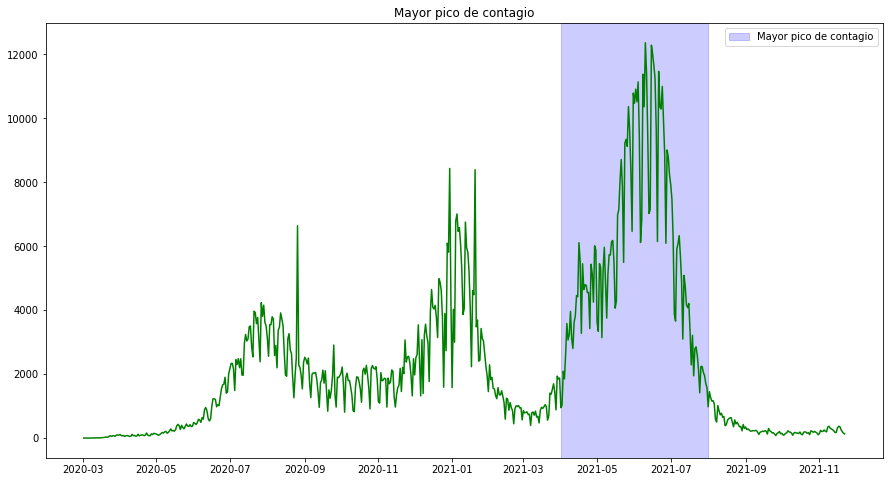

In [617]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.plot(S['Casos'][:625], color = 'Green')
ax.axvspan(pd.Timestamp('2021-04-01'),pd.Timestamp('2021-08-01'), alpha = 0.2, color = 'Blue', label = 'Mayor pico de contagio')
ax.set_title('Mayor pico de contagio')

plt.legend()

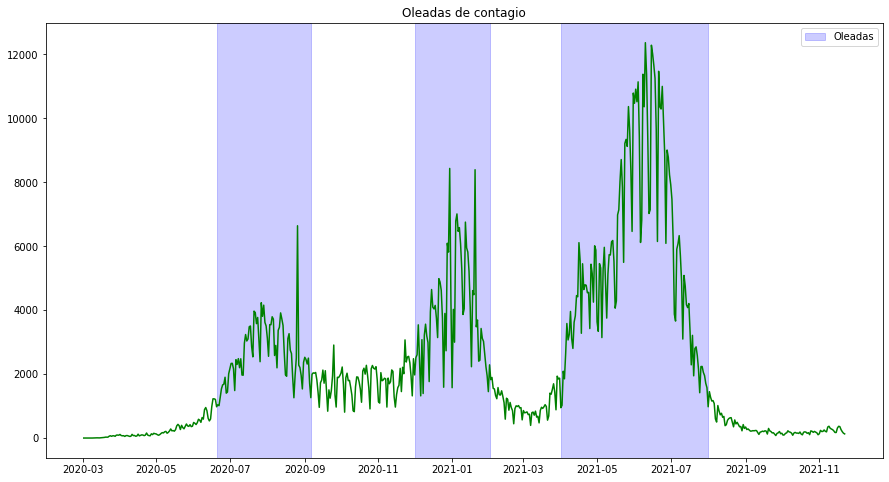

In [625]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.plot(S['Casos'][:625], color = 'Green')
ax.axvspan(pd.Timestamp('2021-04-01'),pd.Timestamp('2021-08-01'), alpha = 0.2, color = 'Blue', label = 'Oleadas')
ax.axvspan(pd.Timestamp('2020-12-01'),pd.Timestamp('2021-02-01'), alpha = 0.2, color = 'Blue')
ax.axvspan(pd.Timestamp('2020-06-20'),pd.Timestamp('2020-09-06'), alpha = 0.2, color = 'Blue')
ax.set_title('Oleadas de contagio')

plt.legend()

## **Predicción**

In [ ]:

import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
from tensorflow. keras.preprocessing.sequence import TimeseriesGenerator

In [409]:
#X = S['Casos'];X
#X_train = X[:500]
#X_test = X[500:623]
#X_pron = X[623:]

S = np.array(S['Casos'].values)

In [410]:
genera = TimeseriesGenerator(S,S,length = 8, batch_size = 12)

In [411]:
mod = tf.keras.models.Sequential()
mod.add(tf.keras.Input(shape = (8,)))
#mod.add(tf.keras.layers.Dense(16, activation = 'linear'))
#mod.add(tf.keras.layers.Dense(8, activation = 'linear'))
mod.add(tf.keras.layers.Dense(4, activation = 'linear'))
mod.add(tf.keras.layers.Dense(2, activation = 'linear'))
mod.add(tf.keras.layers.Dense(1, activation = 'linear'))



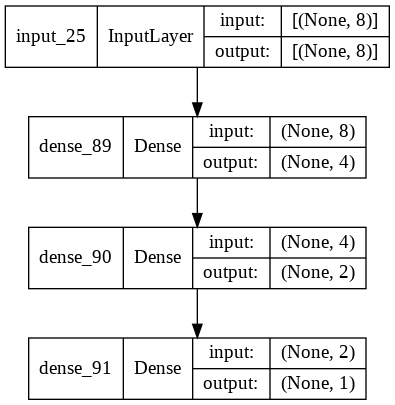

In [412]:
tf.keras.utils.plot_model(mod, show_shapes = True)

In [413]:
mod.compile(loss = 'mse', optimizer = 'adam')

In [414]:
mod.fit_generator(genera, epochs = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
52/52 [==============================] - 0s 2ms/step - loss: 1266590.0000
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 1208900.6250
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 1164373.5000
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 1119200.0000
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 1156275.6250
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 1129933.3750
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 1070792.5000
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 1061814.2500
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 1075592.3750
Epoch 10/100
52/52 [==============================] - 0s 1ms/step - loss: 1027964.1250
Epoch 11/100
52/52 [==============================] - 0s 1ms/step - loss: 1002256.7500
Epoch 12/100
52/52 [==============================] 

In [415]:
print(mod.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 4)                 36        
                                                                 
 dense_90 (Dense)            (None, 2)                 10        
                                                                 
 dense_91 (Dense)            (None, 1)                 3         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


In [416]:
y_pred_mod = mod.predict_generator(genera)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


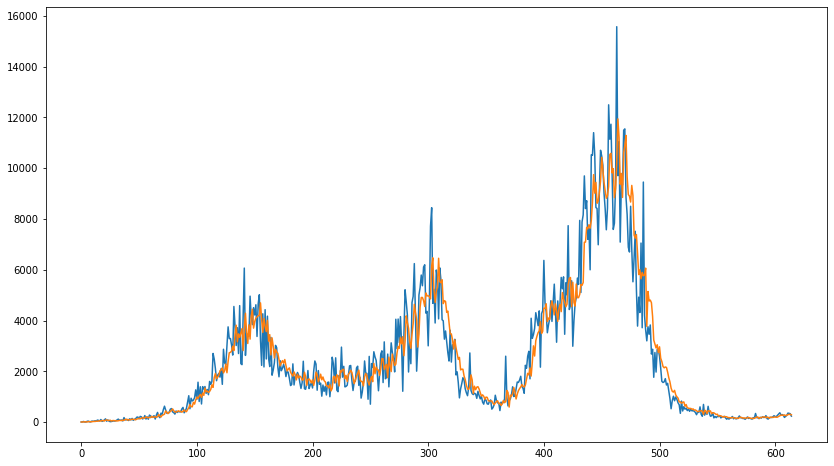

In [417]:
plt.figure(figsize = (14,8))

plt.plot(S[8:])
plt.plot(y_pred_mod)

In [675]:
#X = S['Casos']
#X_train = X[:500]
#X_test = X[500:623]
#X_pron = X[623:]
#history=mod.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test),batch_size=8)
#result = []
#for i in range(8):
#    prop=mod.predict(X_test)
#   results.append(prop[0])
#  print(result)
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =35)

NameError: ignored

In [447]:
X_test

Date
2021-07-23    3825
2021-07-24    2680
2021-07-25    2870
2021-07-26    1766
2021-07-27    2742
              ... 
2021-11-18     267
2021-11-19     355
2021-11-20     347
2021-11-21     331
2021-11-22     237
Name: Casos, Length: 123, dtype: int64

# Pronostico 2

In [316]:

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [332]:
X = S['Casos'];X
#Y = S['Casos']

SyntaxError: ignored

In [317]:
  X_train = X[:500]
  X_test = X[500:623]
  X_pron = X[623:]

In [319]:
def modelo2():
    mod = Sequential() 
    mod.add(Dense(8, input_shape=(1,8),activation='linear'))
    mod.add(Flatten())
    mod.add(Dense(1, activation='linear'))
    mod.compile(loss='mse',optimizer='Adam')
    mod.summary()
    return mod

In [322]:
mod = modelo2()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1, 8)              72        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_67 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [325]:

history=mod.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test),batch_size=8)

ValueError: ignored